In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
pd.set_option('display.max_columns', None)

In [39]:
df=pd.read_csv('/kaggle/input/football-dataset/soccer.csv')
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [40]:
df.shape

(660, 15)

# Q1: What is the total number of goals scored in the entire dataset?




In [41]:
goals = df['Goals'].sum()
print(f'Total numbers of goals scored in entire data set is {goals}')

Total numbers of goals scored in entire data set is 7795


#### *Total numbers of goals scored in entire data set is 7795*

# Q2: Which player has scored the most goals as a substitution

In [42]:
df

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Netherlands,Eredivisie,(UTR),Gyrano Kerk,24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020
656,Netherlands,Eredivisie,(AJA),Quincy Promes,18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020
657,Netherlands,Eredivisie,(PSV),Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020
658,Netherlands,Eredivisie,NaN,Cyriel Dessers,26,0,2461,15,14.51,0.56,84,43,3.24,1.66,2020


In [66]:
# df['Substitution']

KeyError: 'Substitution'

unable to select substitution

# Q3: Find the top 5 players with the most number of goals scored. Also find the total number of goals scored by them

In [44]:
result = df[['Player Names','Goals']].sort_values(by="Goals",ascending=False).head()
result = result.reset_index(drop=True)
result.columns = ['Player Names', 'Goals']
result


,Player Names,Goals
0,Cristiano Ronaldo,42
1,Lionel Messi,37
2,Ciro Immobile,36
3,Lionel Messi,36
4,Carlos Vela,36


# Q4: What are the top 10 countries with the most number of players in the dataset?

In [45]:
result = df.groupby('Country')['Player Names'].count().sort_values(ascending=False).head(10)
result = result.reset_index()
result.columns = ['Country', 'Number of Players']
result


,Country,Number of Players
0,Brazil,100
1,Germany,100
2,Italy,100
3,Spain,100
4,England,80
5,France,60
6,Netherlands,40
7,Portugal,40
8,USA,40


# Q5: # Q1. Create a new dataframe after removing the ourliers for Mins Column in the dataset (conside the upper quantile to be 99 percentile and the lower quantile to be 1 percentile.). After that Find the difference in the number of rows?

* Difference is df.shape(only rows) - df.shape(rows of filtered data only)

In [46]:
df.shape[0]

660

In [47]:
Q1 = df['Mins'].quantile(0.01)
Q99 = df['Mins'].quantile(0.99)
interquartile_range = df[(df['Mins'] >= Q1) & (df['Mins'] <= Q99)]
difference = df.shape[0] - interquartile_range.shape[0]
interquartile_range.shape


(646, 15)

In [48]:
print(f'Differnce between the two dataframe is {difference}')

Differnce between the two dataframe is 14


#### Differnce between the two dataframe is 14


# Q6: Which top 5 players have scored the maximum number of goals throughout all the years? Display them in descending order

In [49]:
player_goals = df.groupby('Player Names')['Goals'].sum()
sorted_players = player_goals.sort_values(ascending=False)
top_5_players = sorted_players.head(5)

top_5_players

Player Names
Lionel Messi          135
Cristiano Ronaldo     128
Robert Lewandowski    127
Ciro Immobile         107
Luis Suarez            95
Name: Goals, dtype: int64

# Q7. Using Bar Plot show in which year has Cristiano Ronaldo scored the most number of goals?

In [50]:
grouped = df.groupby(['Player Names', 'Year']).sum('Goals')
player_name = 'Cristiano Ronaldo'
player_data = grouped.loc[player_name]
player_data["Goals"]

Year
2016    42
2017    26
2018    21
2019    31
2020     8
Name: Goals, dtype: int64

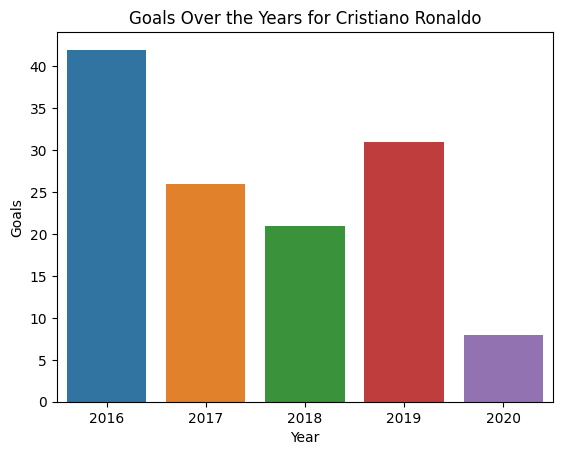

In [51]:
years = player_data.index.get_level_values('Year')
goals = player_data['Goals']

# a bar plot
sns.barplot(x=years, y=goals)
plt.xlabel('Year')
plt.ylabel('Goals')
plt.title(f'Goals Over the Years for {player_name}')
plt.show()

# Q8. In the year 2019 who has more Goals between Ronaldo and Messi? 
- First print them normally 
- Display the comparison using a bar plot

In [52]:
compare = df.groupby(['Player Names', 'Year']).sum('Goals').reset_index()
compare = compare[compare['Year'] == 2019 ]
compare = compare[compare['Player Names'].isin(['Cristiano Ronaldo','Lionel Messi'])]
compare[['Player Names','Goals']]

,Player Names,Goals
129,Cristiano Ronaldo,31
379,Lionel Messi,25


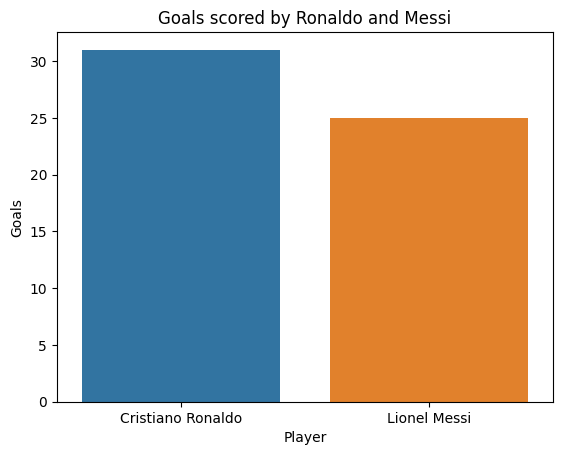

In [53]:
names = compare['Player Names']
goals = compare['Goals']
sns.barplot(x=names, y=goals)
plt.xlabel('Player')
plt.ylabel('Goals')
plt.title(f'Goals scored by Ronaldo and Messi')

plt.show()

Ronaldo has scored more goals in 2019

# Q9: Using Pie Chart show the amount of data various Countries are containing in this dataset(use the Country Columns Display the percentage of data as well in the pie chart

In [54]:
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
total = country_counts['Count'].sum()
country_counts['Percentage'] = (country_counts['Count'] / total) * 100
country_counts


,Country,Count,Percentage
0,Spain,100,15.151515
1,Italy,100,15.151515
2,Germany,100,15.151515
3,Brazil,100,15.151515
4,England,80,12.121212
5,France,60,9.090909
6,USA,40,6.060606
7,Portugal,40,6.060606
8,Netherlands,40,6.060606


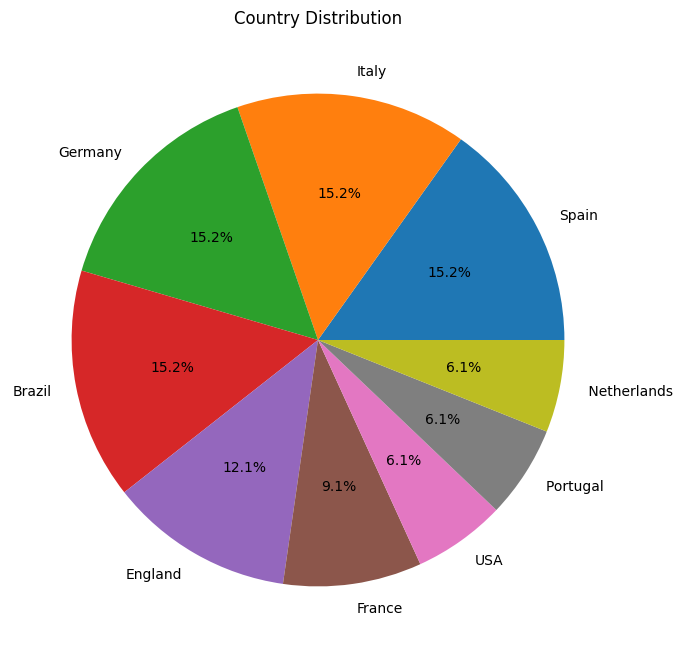

In [55]:
plt.figure(figsize=(8, 8))
plt.pie(country_counts['Count'], labels=country_counts['Country'], autopct='%1.1f%%')
plt.title('Country Distribution')

# Show the chart
plt.show()

# Q10: Display a Heatmap  to show the correlation between the columns in the dataset. The heatmap should have the value of the correlation printed within the boxes.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  660 non-null    object 
 1   League                   660 non-null    object 
 2   Club                     626 non-null    object 
 3   Player Names             660 non-null    object 
 4   Matches_Played           660 non-null    int64  
 5   Substitution             660 non-null    int64  
 6   Mins                     660 non-null    int64  
 7   Goals                    660 non-null    int64  
 8   xG                       660 non-null    float64
 9   xG Per Avg Match         660 non-null    float64
 10  Shots                    660 non-null    int64  
 11  OnTarget                 660 non-null    int64  
 12  Shots Per Avg Match      660 non-null    float64
 13  On Target Per Avg Match  660 non-null    float64
 14  Year                     6

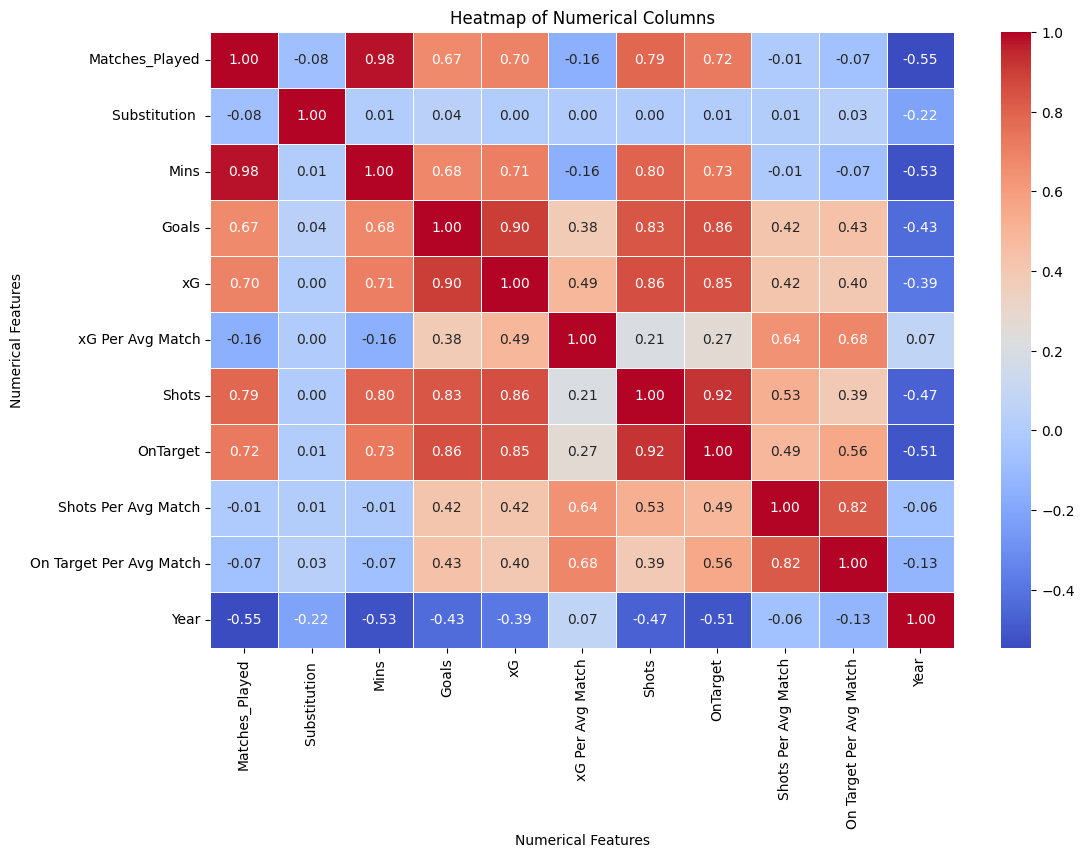

In [57]:

numerical_columns = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title('Heatmap of Numerical Columns')
plt.xlabel('Numerical Features')
plt.ylabel('Numerical Features')

# Show the heatmap
plt.show()


# Q11: Which Country has the maximum median OnTarget Shots among all the Countries in the year 2020?

In [58]:
df_2020 = df[df['Year'] == 2020]
median_shots = df_2020.groupby('Country')['OnTarget'].median().reset_index()
max_median_country = median_shots[median_shots['OnTarget'] == median_shots['OnTarget'].max()]

max_median_country


,Country,OnTarget
0,Netherlands,25.5


# Q12. Who has the best average  Goals per minute?
* Consider only those players who have played more than 30 games
* Then Find Goals per minute
* Find Mean of Goals per minute and sort the values

In [59]:
df['Goals per minute'] = df['Mins'] / df['Goals']
filtered_df = df[df['Matches_Played'] > 30]

mean_goals_per_minute = filtered_df['Goals per minute'].mean()
sorted_df = filtered_df.sort_values(by='Goals per minute', ascending=False)
best_player = sorted_df.iloc[0]

print(f"Player with the best average Goals per minute: {best_player['Player Names']} ({best_player['Goals per minute']:.2f} Goals/minute)")
print(f"Mean of Goals per minute for players with more than 30 games: {mean_goals_per_minute:.2f}")


Player with the best average Goals per minute: Artur  (435.57 Goals/minute)
Mean of Goals per minute for players with more than 30 games: 208.03


# Q 13. Which Player has the least and most number of missed shots in the dataset?
* Missed Shots=Shots-On Target

In [60]:
df['Missed Shots' ] = df['Shots'] - df['OnTarget']
minimum_value = df['Missed Shots'].min()

maximum_value = df['Missed Shots'].max()

# Print the results
print("Minimum value in the column:", minimum_value)
print("Maximum value in the column:", maximum_value)


Minimum value in the column: 1
Maximum value in the column: 129


In [61]:
max_missed = df[df['Missed Shots'] == df['Missed Shots'].max()]
min_missed = df[df['Missed Shots'] == df['Missed Shots'].min()]
min_player = min_missed['Player Names'].tolist()
max_player = max_missed['Player Names'].values[0]
print(f'Players with the least number of missed shots are {", ".join(min_player)} with only 1 missed shot')
print(f'Player with the most number of missed shots is {max_player} with 129 missed shots ')

Players with the least number of missed shots are Esteban Burgos, Kevin Volland with only 1 missed shot
Player with the most number of missed shots is Cristiano Ronaldo with 129 missed shots 


#### Players with the least number of missed shots are Esteban Burgos, Kevin Volland with only 1 missed shot
#### Player with the most number of missed shots is Cristiano Ronaldo with 129 missed shots 

# Q14: How many countries have had players who played more than 35 matches? Create a bar plot to display the count for each country.

In [62]:
countries = df[df['Matches_Played'] > 35]['Country'].value_counts()
number_of_countries = len(countries)

print("Number of countries with players who played more than 35 matches:", number_of_countries)


Number of countries with players who played more than 35 matches: 5


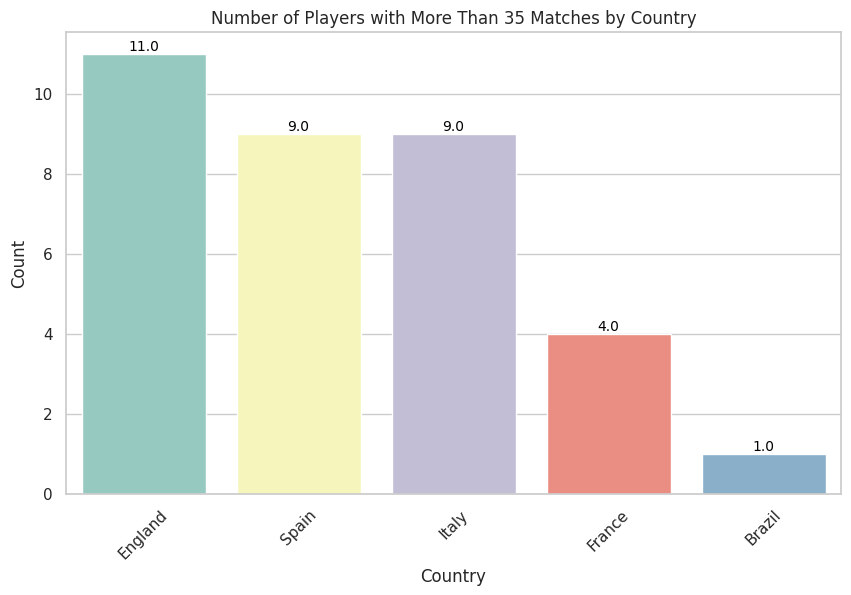

In [63]:
filtered_data = df[df['Matches_Played'] > 35]

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  
ax = sns.countplot(data=filtered_data, x='Country', order=filtered_data['Country'].value_counts().index, palette="Set3")
ax.set_title('Number of Players with More Than 35 Matches by Country')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Q15: Draw a Line Chart to show the comparison of the top 5 highest scoring players in the dataset throughout the years(2016-2020)

In [64]:
highest_goals= df.groupby(['Player Names','Year']).sum('Goals').reset_index().sort_values(by='Goals',ascending=False)
player = highest_goals['Player Names'].unique()[0:5]
highest_goals = highest_goals[highest_goals['Player Names'].isin(player)].sort_values('Year')

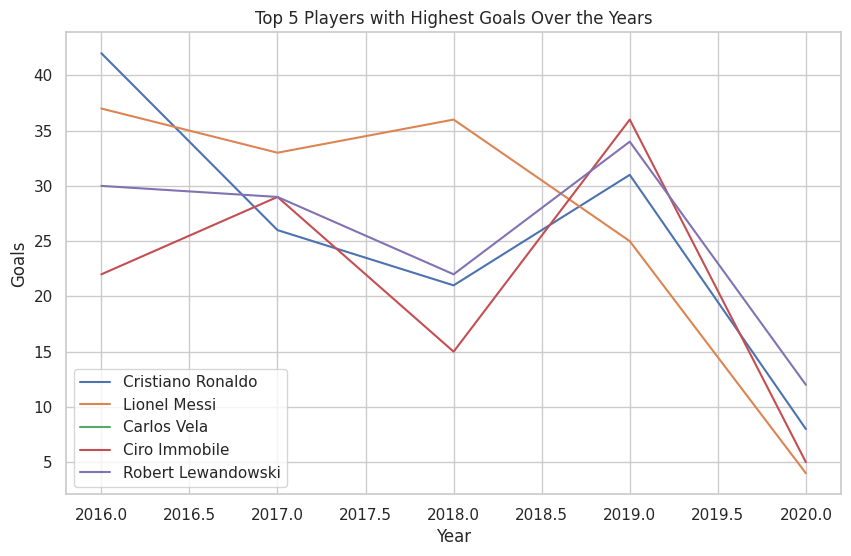

In [65]:
plt.figure(figsize=(10, 6))

for player in player:
    player_data = highest_goals[highest_goals['Player Names'] == player]
    plt.plot(player_data['Year'], player_data['Goals'], label=player)

plt.xlabel('Year')
plt.ylabel('Goals')
plt.title('Top 5 Players with Highest Goals Over the Years')
plt.legend()
plt.grid(True)

# Display the chart
plt.show()